<a href="https://colab.research.google.com/github/aettikang/DataAnalysisPlan/blob/main/openDART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install OpenDartReader

In [2]:
# 필요한 라이브러리를 불러옵니다.
import OpenDartReader
import pandas as pd

# DART API 키 설정
api_key = '18e774f472941bee59d89cc43b47ab046dea27bf'  # 여기에 실제 API 키를 입력하세요.

# OpenDartReader 객체 생성
dart = OpenDartReader(api_key)

# 삼성전자의 재무제표 데이터 추출
# 삼성전자의 종목 코드는 '005930'입니다.
corp_code = '005930'  # 삼성전자의 종목 코드
year = 2022  # 사업보고서 연도 설정

# 사업보고서 내의 재무제표 섹션을 가져옵니다. 예: 'bs'는 재무상태표, 'is'는 손익계산서를 의미합니다.
# 여기서는 'bs' (재무상태표)를 예로 듭니다. 반환형태는 DataFrame입니다.
fs = dart.finstate_all(corp_code, year, fs_div='CFS', reprt_code='11011')

# fs 변수를 출력하여 결과를 확인합니다.
print(fs)


reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
           rcept_no reprt_code bsns_year corp_code sj_div  sj_nm  \
0    20230307000542      11011      2022  00126380     BS  재무상태표   
1    20230307000542      11011      2022  00126380     BS  재무상태표   
2    20230307000542      11011      2022  00126380     BS  재무상태표   
3    20230307000542      11011      2022  00126380     BS  재무상태표   
4    20230307000542      11011      2022  00126380     BS  재무상태표   
..              ...        ...       ...       ...    ...    ...   
180  20230307000542      11011      2022  00126380    SCE  자본변동표   
181  20230307000542      11011      2022  00126380    SCE  자본변동표   
182  20230307000542      11011      2022  00126380    SCE  자본변동표   
183  20230307000542      11011      2022  00126380    SCE  자본변동표   
184  20230307000542      11011      2022  00126380    SCE  자본변동표   

                                            account_id       account_nm  \
0                              ifrs-full_CurrentAssets    

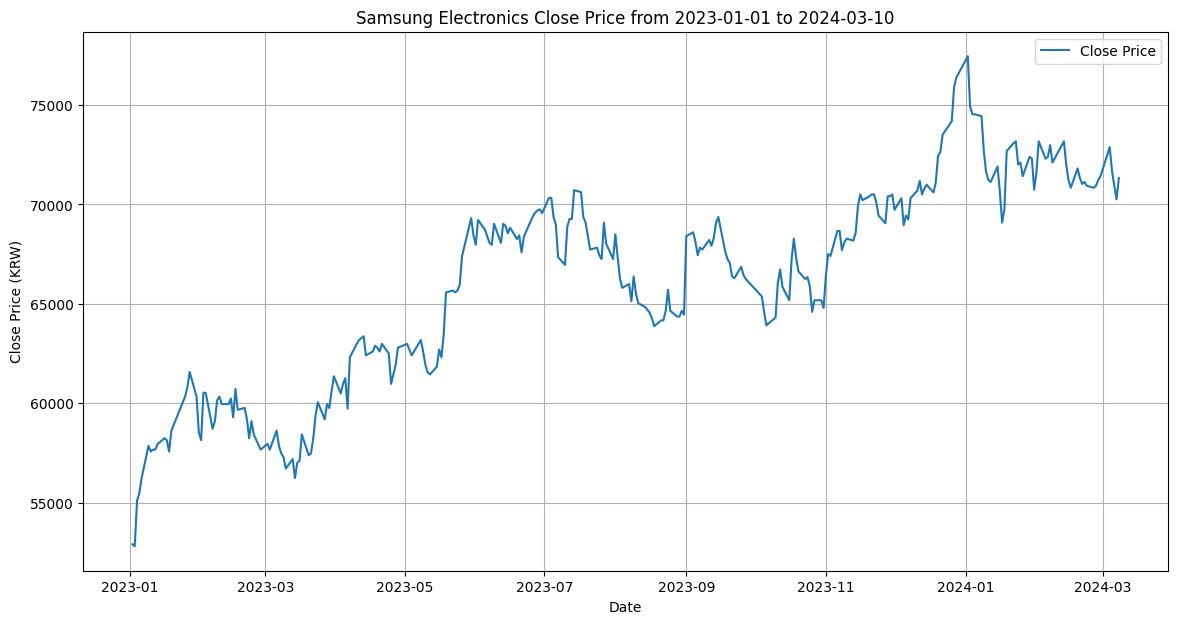

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# 삼성전자의 티커 심볼
ticker_symbol = '005930.KS'

# yfinance를 사용하여 삼성전자의 주가 데이터를 가져옵니다.
samsung = yf.Ticker(ticker_symbol)

# 2023년 1월 1일부터 2024년 3월 10일까지의 주가 데이터를 가져옵니다.
start_date = '2023-01-01'
end_date = '2024-03-10'
hist = samsung.history(start=start_date, end=end_date)

# 종가 데이터를 시각화합니다.
plt.figure(figsize=(14, 7))  # 그래프 크기 설정
plt.plot(hist.index, hist['Close'], label='Close Price')  # 종가 그래프를 그립니다.
plt.title('Samsung Electronics Close Price from 2023-01-01 to 2024-03-10')  # 그래프 제목 설정
plt.xlabel('Date')  # x축 레이블 설정
plt.ylabel('Close Price (KRW)')  # y축 레이블 설정
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.show()  # 그래프 표시


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


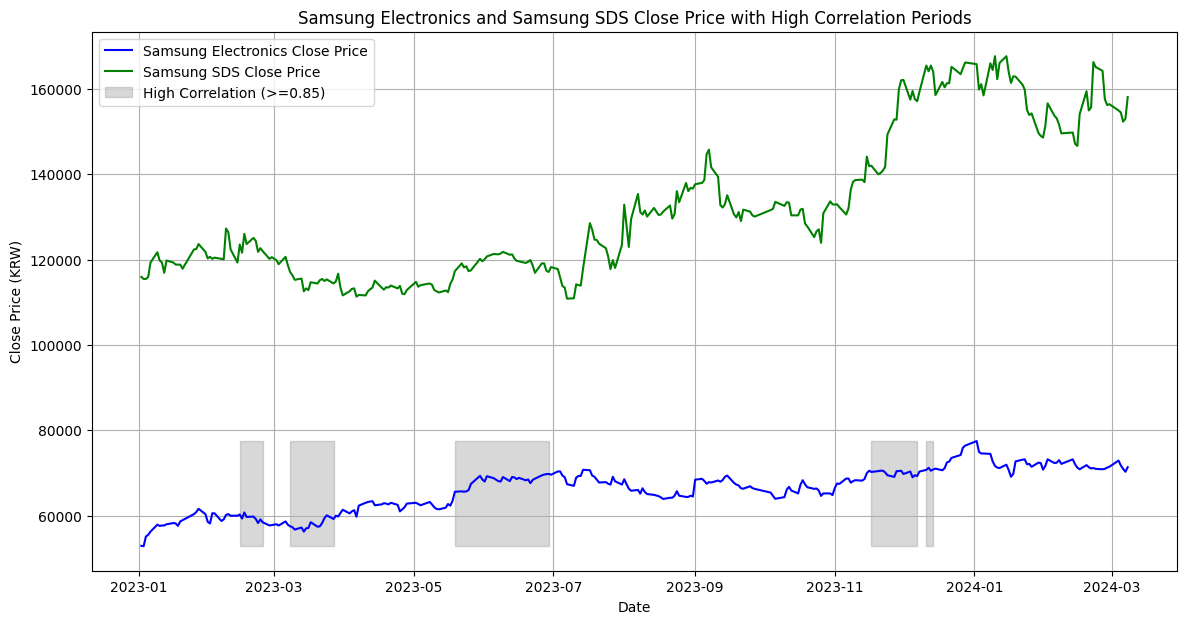

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# 삼성전자와 삼성에스디에스의 티커 심볼 설정
symbols = ['005930.KS', '018260.KS']  # 삼성전자: '005930.KS', 삼성에스디에스: '018260.KS'

# 주가 데이터 가져오기
start_date = '2023-01-01'
end_date = '2024-03-10'
samsung_electronics = yf.download('005930.KS', start=start_date, end=end_date)['Close']
samsung_sds = yf.download('018260.KS', start=start_date, end=end_date)['Close']

# 데이터프레임 합치기
# Use to_numpy().flatten() or .values.flatten() to make the data 1-dimensional
df = pd.DataFrame({'Samsung Electronics': samsung_electronics.to_numpy().flatten(), 'Samsung SDS': samsung_sds.to_numpy().flatten()}, index=samsung_electronics.index)
# Alternatively, you can use .squeeze() to remove the extra dimension:
# df = pd.DataFrame({'Samsung Electronics': samsung_electronics.squeeze(), 'Samsung SDS': samsung_sds.squeeze()}, index=samsung_electronics.index)


# 상관계수 계산
rolling_correlation = df['Samsung Electronics'].rolling(window=30).corr(df['Samsung SDS'])

# 상관계수가 0.85 이상인 기간 찾기
high_corr_periods = rolling_correlation >= 0.60

# 그래프 그리기
plt.figure(figsize=(14, 7))

# 삼성전자 종가 그래프
plt.plot(df.index, df['Samsung Electronics'], label='Samsung Electronics Close Price', color='blue')

# 삼성에스디에스 종가 그래프
plt.plot(df.index, df['Samsung SDS'], label='Samsung SDS Close Price', color='green')

# 상관계수가 0.85 이상인 기간 표시
plt.fill_between(df.index, df['Samsung Electronics'].min(), df['Samsung Electronics'].max(),
                 where=high_corr_periods, color='gray', alpha=0.3, label='High Correlation (>=0.85)')

plt.title('Samsung Electronics and Samsung SDS Close Price with High Correlation Periods')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.7 MB/s eta 0:00:00


In [8]:
import FinanceDataReader as fdr
# KOSPI 상장 종목 목록 불러오기
kospi_list = fdr.StockListing('KOSPI')

# 종목 코드 추출 및 각 코드에 '.KS' 접미사 추가
kospi_tickers = [code + '.KS' for code in kospi_list['Code']]
print(kospi_tickers[:5])

['005930.KS', '000660.KS', '207940.KS', '373220.KS', '005380.KS']


In [9]:
#KOSDAK 종목도 비교
# KOSPI 상장 종목 목록 불러오기
kosdak_list = fdr.StockListing('KOSDAQ')

# 종목 코드 추출 및 각 코드에 '.KS' 접미사 추가
kosdaq_tickers = [code + '.KS' for code in kospi_list['Code']]
print(kosdaq_tickers[:5])

['005930.KS', '000660.KS', '207940.KS', '373220.KS', '005380.KS']


In [10]:
import yfinance as yf
import pandas as pd

# 코스피 종목 코드 리스트 (예시)
#kospi_tickers = ['005930.KS', '000660.KS', '035420.KS']  # 실제로는 모든 코스피 종목 코드를 포함해야 합니다.

# 종가 데이터를 저장할 데이터프레임 생성
# 각 종목의 주가 데이터 다운로드 및 DataFrame으로 합치기
data_frames = []
for ticker in kospi_tickers:
    data = yf.download(ticker, start=start_date, end=end_date)['Close']
    data_frames.append(data.rename(ticker))

close_prices = pd.concat(data_frames, axis=1)

# 삼성전자와 다른 종목들 간의 상관계수 계산
correlations = close_prices.corr().loc['005930.KS'].sort_values(ascending=False)

# 상관계수가 높은 상위 5개 종목 출력 (삼성전자 자신 제외)
print(correlations[1:6])


[*********************100%***********************]  1 of 1 completed


TypeError: 'str' object is not callable

In [ ]:
import yfinance as yf
import pandas as pd
import FinanceDataReader as fdr

def get_top_correlated_tickers_with_concat(market_type, top_n=10):
    """
    주어진 시장의 상장 종목 중 삼성전자(005930.KS)와 상관계수가 높은 상위 n개 종목을 찾습니다.
    이번에는 pd.concat()을 사용하여 DataFrame의 파편화를 방지합니다.

    Parameters:
    - market_type: 'KOSPI' 또는 'KOSDAQ' 중 하나를 지정합니다.
    - top_n: 반환할 상위 종목의 개수입니다.

    Returns:
    - 상관계수가 높은 상위 n개 종목의 코드와 상관계수를 포함하는 DataFrame.
    """
    # 시장 종목 코드 리스트 가져오기
    market_list = fdr.StockListing(market_type)
    tickers = market_list['Code'].apply(lambda x: x + '.KS' if market_type == 'KOSPI' else x + '.KQ').tolist()
    if '005930.KS' not in tickers:
        tickers.append('005930.KS')

    # 각 종목의 주가 데이터 다운로드
    data_frames = []
    for ticker in tickers:
        try:
            data = yf.download(ticker, start='2023-01-01', end='2024-03-10')['Close'].rename(ticker)
            data_frames.append(data)
        except Exception as e:
            print(f"Error downloading {ticker}: {e}")

    # 모든 주가 데이터를 하나의 DataFrame으로 합치기
    close_prices = pd.concat(data_frames, axis=1)

    # 삼성전자와 다른 종목들 간의 상관계수 계산
    correlations = close_prices.corr().loc['005930.KS'].sort_values(ascending=False)

    # 상관계수가 높은 상위 n개 종목 반환 (삼성전자 제외)
    return correlations[1:top_n+1]

# KOSPI 시장에서 삼성전자와 상관계수가 높은 상위 5개 종목 찾기
top_correlated_kospi = get_top_correlated_tickers_with_concat('KOSDAQ')
print("KOSPI:", top_correlated_kospi)
